In [2]:
import pandas as pd
import nltk
import seaborn as sns
import re

sns.set()

In [3]:
#Importamos datasets de reviews y de restaurants
reviews = pd.read_parquet('https://storage.googleapis.com/restaurants_datalake/reviews_final.parquet')
restaurants = pd.read_parquet('https://storage.googleapis.com/restaurants_datalake/restaurants.parquet')

In [3]:
restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171419 entries, 0 to 171418
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Id_Restaurant        171419 non-null  object 
 1   Nombre               171419 non-null  object 
 2   Ciudad               171419 non-null  object 
 3   Estado               171419 non-null  object 
 4   Cod_postal           171419 non-null  object 
 5   Latitud              171419 non-null  float64
 6   Longitud             171419 non-null  float64
 7   Tipo                 171419 non-null  object 
 8   Ambiente             171419 non-null  int64  
 9   Para_grupos          171419 non-null  int64  
 10  Promociones          171419 non-null  int64  
 11  Estacionamiento      171419 non-null  int64  
 12  Inclusivo            171419 non-null  int64  
 13  Comodidades          171419 non-null  int64  
 14  Exteriores           171419 non-null  int64  
 15  Atencion_comida  

In [4]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16007867 entries, 0 to 16007866
Data columns (total 5 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   Cod_Usuario    int32 
 1   Id_Restaurant  object
 2   Rating         int64 
 3   Reseña         object
 4   Timestamp      Int64 
dtypes: Int64(1), int32(1), int64(1), object(2)
memory usage: 564.9+ MB


In [5]:
#Nos quedamos con las columnas que nos interesan
reseñas = reviews.drop(columns=['Cod_Usuario','Timestamp','Id_Restaurant'])
reseñas.head()

,Rating,Reseña
0,4,"On the higher end of price for pizza, but they..."
1,4,I love the food here. Service doesn't seem to ...
2,3,Food was ok but service was absolutely terrible.
3,5,You can't beat 1/2 price drinks during happy h...
4,5,Good food and fast service. Never had to wait ...


In [6]:
#Descartamos los nulos
reseñas.dropna(inplace=True)
reseñas.reset_index(inplace=True,drop=True)
reseñas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11257361 entries, 0 to 11257360
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Rating  int64 
 1   Reseña  object
dtypes: int64(1), object(1)
memory usage: 171.8+ MB


In [7]:
#Vemos que valores toman los ratings
reseñas['Rating'].unique()

array([4, 3, 5, 1, 2], dtype=int64)

<AxesSubplot: xlabel='Rating', ylabel='count'>

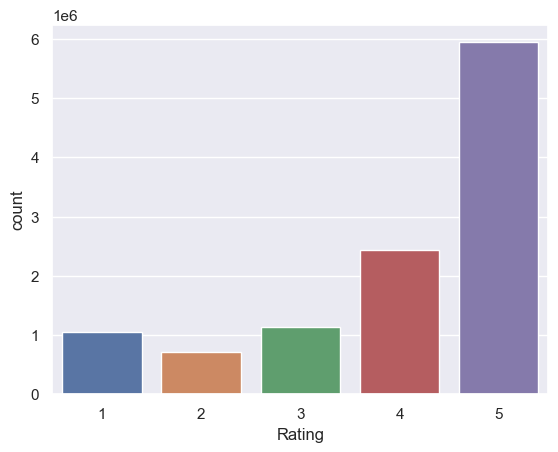

In [8]:
#Vemos cuantos hay de cada uno
sns.countplot(data=reseñas,x='Rating')

Se ve que el dataset esta bastante desbalanceado hacia lo favorable. Hay más reseñas de 5 estrellas que del resto de los valores. Si bien como no vamos a alimentar un modelo predictivo y es solamente para realizar análisis no hace falta balancear, es necesario tenerlo en cuenta.

In [9]:
#Vamos a hacer el trabajo en una porción del dataset para observar el resultado y que los tiempos sean menores
prueba = reseñas.iloc[:1000000]             #Definimos cantidad de reseñas a tomar
reseña_sin_caracteres_raros = []
for i in range(prueba.shape[0]):
    reseña_sin_caracteres_raros.append(re.sub("[^a-zA-Z]"," ",str(prueba['Reseña'].values[i])))

In [10]:
#Agregamos la columna
prueba['Reseña_paso1'] = reseña_sin_caracteres_raros
prueba.head()

C:\Users\larra\AppData\Local\Temp\ipykernel_5660\2735097145.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prueba['Reseña_paso1'] = reseña_sin_caracteres_raros


,Rating,Reseña,Reseña_paso1
0,4,"On the higher end of price for pizza, but they...",On the higher end of price for pizza but they...
1,4,I love the food here. Service doesn't seem to ...,I love the food here Service doesn t seem to ...
2,3,Food was ok but service was absolutely terrible.,Food was ok but service was absolutely terrible
3,5,You can't beat 1/2 price drinks during happy h...,You can t beat price drinks during happy h...
4,5,Good food and fast service. Never had to wait ...,Good food and fast service Never had to wait ...


In [11]:
text_tokenizado = []
for i in range(prueba.shape[0]):
    text_tokenizado.append(nltk.tokenize.word_tokenize(prueba['Reseña_paso1'].values[i].lower()))

In [12]:
#Agregamos la columna
prueba['Reseña_paso2'] = text_tokenizado
prueba.head()

C:\Users\larra\AppData\Local\Temp\ipykernel_5660\3405440822.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prueba['Reseña_paso2'] = text_tokenizado


,Rating,Reseña,Reseña_paso1,Reseña_paso2
0,4,"On the higher end of price for pizza, but they...",On the higher end of price for pizza but they...,"[on, the, higher, end, of, price, for, pizza, ..."
1,4,I love the food here. Service doesn't seem to ...,I love the food here Service doesn t seem to ...,"[i, love, the, food, here, service, doesn, t, ..."
2,3,Food was ok but service was absolutely terrible.,Food was ok but service was absolutely terrible,"[food, was, ok, but, service, was, absolutely,..."
3,5,You can't beat 1/2 price drinks during happy h...,You can t beat price drinks during happy h...,"[you, can, t, beat, price, drinks, during, hap..."
4,5,Good food and fast service. Never had to wait ...,Good food and fast service Never had to wait ...,"[good, food, and, fast, service, never, had, t..."


In [4]:
#Importamos las stopwords de nltk
stopwords = nltk.corpus.stopwords.words('english')
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

Vemos que hay muchas stopwords como won't, wouldn't que están presentes en la reseña pero cuando quitamos los caracteres especiales ya no están más. Hay que cambiar el orden en que se hace el trabajo. Ahora, como estamos probando, seguimos así.

In [5]:
#Le agregamos algunos adjetivos que no nos van a brindar informacion alguna (vamos actualizando)
agregar_a_sw = ['good','bad','awesome','awfull','love','like','well','ok','get','back','never','one','two','three','amazing'
                'four','five','go','would','got','said','us','came','ask','told','went','better','worst','great','best','horrible']
for p in agregar_a_sw:
    stopwords.append(p)

In [15]:
#Limpiamos la reseña de stopwords
text_sin_sw = []
for i in range(prueba.shape[0]):
    texto = prueba['Reseña_paso2'].values[i]
    lista = [word for word in texto if word not in stopwords]
    text_sin_sw.append(lista)

In [16]:
#Armamos columna
prueba['Reseña_paso3'] = text_sin_sw
prueba.head()

C:\Users\larra\AppData\Local\Temp\ipykernel_5660\671245305.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prueba['Reseña_paso3'] = text_sin_sw


,Rating,Reseña,Reseña_paso1,Reseña_paso2,Reseña_paso3
0,4,"On the higher end of price for pizza, but they...",On the higher end of price for pizza but they...,"[on, the, higher, end, of, price, for, pizza, ...","[higher, end, price, pizza, many, different, t..."
1,4,I love the food here. Service doesn't seem to ...,I love the food here Service doesn t seem to ...,"[i, love, the, food, here, service, doesn, t, ...","[food, service, seem, summit, location]"
2,3,Food was ok but service was absolutely terrible.,Food was ok but service was absolutely terrible,"[food, was, ok, but, service, was, absolutely,...","[food, service, absolutely, terrible]"
3,5,You can't beat 1/2 price drinks during happy h...,You can t beat price drinks during happy h...,"[you, can, t, beat, price, drinks, during, hap...","[beat, price, drinks, happy, hour]"
4,5,Good food and fast service. Never had to wait ...,Good food and fast service Never had to wait ...,"[good, food, and, fast, service, never, had, t...","[food, fast, service, wait]"


In [17]:
#Chequeamos
prueba.iloc[0].values

array([4,
       "On the higher end of price for pizza, but they have so many different types you can't get anywhere else. I highly recommended you try it at least once.",
       'On the higher end of price for pizza  but they have so many different types you can t get anywhere else  I highly recommended you try it at least once ',
       list(['on', 'the', 'higher', 'end', 'of', 'price', 'for', 'pizza', 'but', 'they', 'have', 'so', 'many', 'different', 'types', 'you', 'can', 't', 'get', 'anywhere', 'else', 'i', 'highly', 'recommended', 'you', 'try', 'it', 'at', 'least', 'once']),
       list(['higher', 'end', 'price', 'pizza', 'many', 'different', 'types', 'anywhere', 'else', 'highly', 'recommended', 'try', 'least'])],
      dtype=object)

Vemos que no hace falta cambiar el proceso. También detecta las t y las elimina.

Lo realizado forma parte del proceso estándar. Vamos a intentar lemmatizar y vamos a ver cuanto demora. Tener en cuenta que lo estamos haciendo con, aproximadamente, 1/11 parte del dataset pero a la vez contemplar que se está haciendo de manera local. En caso de que el resultado sea aceptable podemos aplicar o no el lemmatizado.

In [17]:
#Importamos librería
from nltk.corpus import wordnet

#Definimos funcion
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [22]:
#Importamos el lemmatizer de NLTK, y creamos el objeto
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

#Aplicamos el Lemmatizer (Esto puede tardar un ratito)
reseñas_lemmatizadas = []
for i in range(prueba.shape[0]):
    frase_tok = nltk.word_tokenize(prueba['Reseña_paso1'][i].lower())
    frase_lemma = [wordnet_lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in frase_tok]
    reseñas_lemmatizadas.append(frase_lemma)

KeyboardInterrupt: 

226 minutos y aún no termino de correr. No es práctico. Vamos a hacerlo sin este proceso.

In [18]:
#Nos quedamos colamente con la última columna
prueba_filtrado = prueba.drop(columns=['Reseña','Reseña_paso1','Reseña_paso2'])
prueba_filtrado.head()

,Rating,Reseña_paso3
0,4,"[higher, end, price, pizza, many, different, t..."
1,4,"[food, service, seem, summit, location]"
2,3,"[food, service, absolutely, terrible]"
3,5,"[beat, price, drinks, happy, hour]"
4,5,"[food, fast, service, wait]"


In [19]:
#Filtramos los de una estrella
una_estrella = prueba_filtrado[prueba_filtrado['Rating']==1]
una_estrella.reset_index(inplace=True,drop=True)
una_estrella.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64602 entries, 0 to 64601
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rating        64602 non-null  int64 
 1   Reseña_paso3  64602 non-null  object
dtypes: int64(1), object(1)
memory usage: 1009.5+ KB


In [20]:
#Juntamos todos los comentarios de 1 estrella
comentarios_una_estrella = []
for i in range(una_estrella.shape[0]):
    comentarios_una_estrella += una_estrella['Reseña_paso3'][i]
comentarios_una_estrella

['toaster',
 'oven',
 'app',
 'aware',
 'way',
 'cancel',
 'order',
 'even',
 'though',
 'app',
 'call',
 'store',
 'unhelpful',
 'rude',
 'girl',
 'friend',
 'waited',
 'hour',
 'receive',
 'sweet',
 'tea',
 'unsweetened',
 'tea',
 'short',
 'staffed',
 'server',
 'food',
 'may',
 'worth',
 'wait',
 'time',
 'employees',
 'attitudes',
 'rude',
 'owner',
 'must',
 'care',
 'store',
 'order',
 'extra',
 'cheese',
 'cheese',
 'without',
 'asking',
 'extra',
 'people',
 'working',
 'jst',
 'check',
 'understand',
 'costumers',
 'happy',
 'check',
 'store',
 'closes',
 'others',
 'terrible',
 'service',
 'know',
 'place',
 'order',
 'rude',
 'manager',
 'professionalism',
 'ever',
 'instructions',
 'right',
 'regular',
 'dr',
 'pepper',
 'diet',
 'seem',
 'remember',
 'put',
 'garlic',
 'crust',
 'flavor',
 'stuffed',
 'crust',
 'pizza',
 'brought',
 'sierra',
 'mist',
 'day',
 'asked',
 'mt',
 'dew',
 'simple',
 'things',
 'really',
 'ordering',
 'delivery',
 'quite',
 'called',
 'order',

In [21]:
#Observamos las frecuencias de cada palabra
frec_com_1_est = nltk.FreqDist(comentarios_una_estrella)
frec_com_1_est

FreqDist({'food': 28481, 'order': 16357, 'service': 15757, 'place': 12571, 'time': 10966, 'even': 7701, 'minutes': 7676, 'ordered': 7659, 'pizza': 5914, 'chicken': 5273, ...})

In [22]:
#Armamos dataframe
palabras_1_estrella = pd.DataFrame(list(frec_com_1_est.items()), columns = ["Palabra","Frequencia"])
palabras_1_estrella = palabras_1_estrella.sort_values(by='Frequencia',ascending=False)
palabras_1_estrella.head()

,Palabra,Frequencia
24,food,28481
6,order,16357
48,service,15757
50,place,12571
28,time,10966


In [24]:
palabras_1_estrella.head(10)

,Palabra,Frequencia
24,food,34182
33,service,19943
6,order,18881
85,place,13170
29,time,12926
117,minutes,10606
7,even,9115
266,ordered,8154
286,cold,6940
93,manager,6925


El algoritmo funciona y la celda que mas demoró, lo hizo alrededor de 3 minutos. Si extendemos a todo el dataset, no debiera demorar más de 40. Sin embargo, en vez de eso vamos a probar con todo el dataset de reviews a la que le hayan dado 1 estrella.

In [23]:
#Definimos funcion con todas las operaciones a realizar para cualquier valor de rating
def procesamientoResenas (dataframe,rating:int):
    df = dataframe[dataframe['Rating']==rating]
    df.reset_index(inplace=True,drop=True)
    reseñas_procesadas = []
    for i in range(df.shape[0]):
        texto1 = re.sub("[^a-zA-Z]"," ",str(df['Reseña'].values[i]))
        texto2 = nltk.tokenize.word_tokenize(texto1.lower())
        lista = [word for word in texto2 if word not in stopwords]
        reseñas_procesadas += lista
    frec_palabras = nltk.FreqDist(reseñas_procesadas)
    frec_palabras_df = pd.DataFrame(list(frec_palabras.items()), columns = ["Palabra","Frequencia"])
    return frec_palabras_df.sort_values(by='Frequencia',ascending=False)

In [24]:
#Vemos las palabras más frecuentes en las reviews de 1 estrella
palabras_1_estrella = procesamientoResenas(reseñas,1)
palabras_1_estrella.head(10)

,Palabra,Frequencia
24,food,709281
6,order,385422
50,place,360276
48,service,352329
28,time,306023
269,ordered,258849
190,minutes,231193
7,even,229496
465,restaurant,183492
72,asked,179354


In [28]:
#Vemos las palabras más frecuentes en las reviews de 5 estrellas
palabras_5_estrella = procesamientoResenas(reseñas,5)
palabras_5_estrella.head(10)

,Palabra,Frequencia
10,food,1497085
31,great,1452797
5,place,845806
12,service,797857
15,best,497037
70,delicious,478028
209,amazing,398020
33,friendly,391792
92,always,390921
64,time,384829


Vemos lo similar que son las palabras tanto de 1 como de 5 estrellas. Realizar este proceso para todos los restaurants no nos aporta información alguna. Si nos aportaría información saber que palabras se repiten en un restaurant específico o, quizás, en un tipo de restaurant.

Por otro lado, vamos a dividir las reseñas entre buenas reseñas, malas reseñas y neutrales. Por lo desbalanceado que se encuentra el dataset vamos a tomar a las reseñas buenas como 5, neutrales como 4 y malas como 1, 2 y 3. Realizamos un pequeño cambio en la función y probamos nuevamente.

In [16]:
#Definimos funcion con todas las operaciones a realizar para cualquier valor de rating
def procesamientoResenas (dataframe,tipo:str):
    if tipo.find('uena') != -1:
        df = dataframe[dataframe['Rating']==5]
    elif tipo.find('eutra') != -1:
        df = dataframe[dataframe['Rating']==4]
    else:
        df = dataframe[dataframe['Rating']<4]
    df.reset_index(inplace=True,drop=True)
    reseñas_procesadas = []
    for i in range(df.shape[0]):
        texto1 = re.sub("[^a-zA-Z]"," ",str(df['Reseña'].values[i]))
        texto2 = nltk.tokenize.word_tokenize(texto1.lower())
        lista = [word for word in texto2 if word not in stopwords]
        reseñas_procesadas += lista
    frec_palabras = nltk.FreqDist(reseñas_procesadas)
    frec_palabras_df = pd.DataFrame(list(frec_palabras.items()), columns = ["Palabra","Frequencia"])
    return frec_palabras_df.sort_values(by='Frequencia',ascending=False)

In [27]:
#Filtramos los restaurants de comida americana
rest_americana = restaurants[restaurants['Tipo']=='Comida_Americana']
rest_americana.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64459 entries, 23 to 171414
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id_Restaurant        64459 non-null  object 
 1   Nombre               64459 non-null  object 
 2   Ciudad               64459 non-null  object 
 3   Estado               64459 non-null  object 
 4   Cod_postal           64459 non-null  object 
 5   Latitud              64459 non-null  float64
 6   Longitud             64459 non-null  float64
 7   Tipo                 64459 non-null  object 
 8   Ambiente             64459 non-null  int64  
 9   Para_grupos          64459 non-null  int64  
 10  Promociones          64459 non-null  int64  
 11  Estacionamiento      64459 non-null  int64  
 12  Inclusivo            64459 non-null  int64  
 13  Comodidades          64459 non-null  int64  
 14  Exteriores           64459 non-null  int64  
 15  Atencion_comida      64459 non-nul

In [28]:
#Filtramos las reviews de comida americana
reviews_american = reviews[reviews['Id_Restaurant'].isin(rest_americana['Id_Restaurant'].values)]
reviews_american.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8298736 entries, 1 to 16007866
Data columns (total 5 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   Cod_Usuario    int32 
 1   Id_Restaurant  object
 2   Rating         int64 
 3   Reseña         object
 4   Timestamp      Int64 
dtypes: Int64(1), int32(1), int64(1), object(2)
memory usage: 356.1+ MB


In [29]:
#Casi la mitad del dataset es de comida americana. Nos quedamos con las columnas que nos interesan y filtramos los valores nulos.
res_american = reviews_american.drop(columns=['Cod_Usuario','Timestamp','Id_Restaurant'])
res_american.dropna(inplace=True)
res_american.reset_index(inplace=True,drop=True)
res_american.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5883690 entries, 0 to 5883689
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Rating  int64 
 1   Reseña  object
dtypes: int64(1), object(1)
memory usage: 89.8+ MB


In [30]:
res_malas_american = procesamientoResenas(res_american,'Malas')
res_malas_american.head()

,Palabra,Frequencia
24,food,1141650
68,service,572022
111,place,555407
28,time,439979
6,order,432820


In [ ]:
res_buenas_american = procesamientoResenas(res_american,'Buenas')
res_buenas_american.head()

Tampoco pueden hacerse grandes análisis a partir de esto. El mejor análisis es el que se puede hacer restaurant a restaurant como veremos a continuación. Vamos a hacerlo con el restaurant con mas reseñas de todos.

In [13]:
#Buscamos de que restaurant se trata
reviews.groupby(by='Id_Restaurant').count().sort_values(by='Rating',ascending=False)

,Cod_Usuario,Rating,Reseña,Timestamp
Id_Restaurant,,,,
0x8620a60c5d5e55d3:0x73c7b3c06a67a923,9057,9057,8537,9057
ac1AeYqs8Z4_e2X5M3if2A,7508,7508,7508,7508
0x40771e59f0513085:0x513683476a2005d8,7148,7148,3065,7148
GXFMD0Z4jEVZBCsbPf4CTQ,6149,6149,6149,6149
ytynqOUb3hjKeJfRj5Tshw,5770,5770,5770,5770
...,...,...,...,...
4QdZHOqo7OI63SG6JnLdpg,5,5,5,5
4Qt-KtFm3AJOJnrk61_7JQ,5,5,5,5
i0b_xiKIbExKtF3vqo1Bzw,5,5,5,5


In [7]:
reviews_rest = reviews[reviews['Id_Restaurant']=='0x8620a60c5d5e55d3:0x73c7b3c06a67a923']
reviews_rest.dropna(subset='Reseña',inplace=True)
reviews_rest.reset_index(drop=True,inplace=True)
reviews_rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8537 entries, 0 to 8536
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Cod_Usuario    8537 non-null   int32 
 1   Id_Restaurant  8537 non-null   object
 2   Rating         8537 non-null   int64 
 3   Reseña         8537 non-null   object
 4   Timestamp      8537 non-null   Int64 
dtypes: Int64(1), int32(1), int64(1), object(2)
memory usage: 308.6+ KB


C:\Users\larra\AppData\Local\Temp\ipykernel_13288\1218741003.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_rest.dropna(subset='Reseña',inplace=True)


In [17]:
res_malas_rest = procesamientoResenas(reviews_rest,'Malas')
res_malas_rest.head(10)

,Palabra,Frequencia
1,oysters,2672
22,food,1154
70,place,944
206,line,851
8,oyster,712
165,wait,650
10,service,628
58,fried,603
31,acme,586
55,po,521


In [18]:
res_buenas_rest = procesamientoResenas(reviews_rest,'Buenas')
res_buenas_rest.head(10)

,Palabra,Frequencia
5,oysters,6097
50,chargrilled,1765
28,line,1760
78,place,1691
75,wait,1644
17,food,1525
139,oyster,1516
37,new,1237
183,acme,1224
38,orleans,1160


In [23]:
#Observamos que dicen en los comentarios
#Por ejemplo los que tienen la palabra wait que aparece tanto en las buenas reseñas como en las malas
reviews_rest[(reviews_rest['Rating']==5)&(reviews_rest['Reseña'].str.contains('wait'))]['Reseña'].values

array(["Great food and great service. Get there early to get a table. Otherwise you'll be waiting in line outside.",
       'Our waiter was great and the entire table enjoyed the atmosphere and meals.',
       'Based on the recommendation of a friend, this was my first stop in New Orleans. I ordered a dozen chargrilled oysters and was in heaven. Worth the wait.',
       ...,
       "This place is the BOMB. Prepare for a wait, but totally worth it!\n\nI flew in to NOLA earlier than my friend so I had a few hours to kill before she arrived. This place was right next to our hotel and I saw the reviews were great so I thought i'd give it a try. There was a HUGE line outside, but since I was by myself, they fit me in at the bar right away. SCORE!\n\nI asked the bartender what they recommend and they said they are known for their charbroiled oysters. Hmm never had them but I love oysters, sure give me a half dozen and some jambalaya. \n\nThese charbroiled oysters were seriously the BEST THIN

In [24]:
#Vemos las reseñas malas
reviews_rest[(reviews_rest['Rating']==1)&(reviews_rest['Reseña'].str.contains('wait'))]['Reseña'].values

array(['The oysters were too too small , the crawfish etuffee was not good and the guy that wait on us is not a good waiter.  Very disappointed.',
       "At 1 point in time I had enjoyed this restaurant. Just over a month ago I was racially profile by a waitress at the bar and was accused of not paying my check.  I was humiliated in front of other guess and even arrested. No one out try to apologize at the the accusation of me not paying for my food. The cop on duty was very disrespectful and I wasn't going to tolerate it.  When I told him I wouldn't gonna tolerate his disrespect he arrested me.I'm an electrical engineer For a project that's going on in the city so my coworkers and I has spent thousands of dollars at this location and the one in Baton Rouge.  I plan to file a lawsuit on the city of Metairie and Acme.   I would not recommend this restaurant for any person that tolerates discrimination upon young black and wealthy people. See you in court ACME!!!",
       "Long wait. Ev

Tanto las reseñas buenas como malas mencionan el tema de la espera. En el caso de las buenas dicen que a pesar de la espera el restaurant vale la pena pero esta claro que es un punto de mejora. Este tipo de análisis es el que es bueno realizar.

Para trabajar en el dashboard vamos a dividir el dataset en tipos de comida y a partir de estos buscaremos el restaurant que corresponda para realizar el análisis.

In [3]:
reviews_filt = reviews.dropna(subset='Reseña')
reviews_filt.reset_index(drop=True,inplace=True)
reviews_filt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11257361 entries, 0 to 11257360
Data columns (total 5 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   Cod_Usuario    int32 
 1   Id_Restaurant  object
 2   Rating         int64 
 3   Reseña         object
 4   Timestamp      Int64 
dtypes: Int64(1), int32(1), int64(1), object(2)
memory usage: 397.2+ MB


In [4]:
for t in restaurants['Tipo'].unique():
    ids_restaurants = restaurants[restaurants['Tipo']==t]['Id_Restaurant'].values       #Definimos los ids de restaurant por tipo
    review_tipo = reviews_filt[reviews_filt['Id_Restaurant'].isin(ids_restaurants)]     #Definimos el dataframe por cada tipo
    review_tipo.to_parquet('../Reviews por tipo/'+t+'.parquet')                         #Exportamos en formato parquet

Finalmente subimos estos datasets a Google Cloud Storage

In [5]:
#Importamos librerías
from google.cloud import storage
import os

In [6]:
#Definimos credenciales
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = 'D:/Marcos/Clave GCP/vaulted-aleph-382723-3f77bc5470a3.json'

In [7]:
#Creamos cliente de GCS
client = storage.Client()

In [8]:
#Llamamos a nuestro datalake
bucket = client.get_bucket('restaurants_datalake')

In [ ]:
#Subimos los archivos de las reviews dividido por tipos
for t in restaurants['Tipo'].unique():
    blob_tipo = bucket.blob(t+'.parquet')
    blob_tipo.upload_from_filename('../Reviews por tipo/'+t+'.parquet')